In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Uber Drives - Analysis
Objective: Analyse the trips made by an ordinary user and try to extract important information that would help to understand the behavior of the customer.

## Import csv with uber drives.

In [2]:
data = pd.read_csv('My Uber Drives - 2016.csv')
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
data.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
START_DATE*    1156 non-null object
END_DATE*      1155 non-null object
CATEGORY*      1155 non-null object
START*         1155 non-null object
STOP*          1155 non-null object
MILES*         1156 non-null float64
PURPOSE*       653 non-null object
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


## Cleasing
We may apply data transformation to make facilitate the analysis:
- Drop last row (Total row)
- Transform START_DATE and END_DATA from object data type do datetime format.
- Expand PURPOSE column into more columns in order to have all purposes listed separately (not needed anymore, since there isn't any separated purpose when we have two possible).
- Create a new column with duration of the trip (END_DATA - START_DATE)
- Check each column and search for undesired characters/words. Column PURPOSE has null values, for example.
- Create a new column named day of week.

In [5]:
# Delete last row
df = data.copy()
df.drop(df.tail(1).index,inplace=True)
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [6]:
# Transform date columns to datetime format
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'])
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'])
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [7]:
# Calculation of trip duration (minutes)
df['DURATION'] = df['END_DATE*'] - df['START_DATE*']
df['DURATION'] = df['DURATION'].dt.total_seconds() / 60
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,DURATION
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0


In [8]:
#   We can see that there are some trips with DURATION = 0 and MILES* != 0, 
# which means that the start/end wansn't properly saved.
#   Those trips won't be considered on the analysis when we need to check
# duration or start/end of the trip.
df.sort_values(by='DURATION', ascending=True).head(20)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,DURATION
798,2016-10-08 15:03:00,2016-10-08 15:03:00,Business,Karachi,Karachi,3.6,NaN,0.0
751,2016-09-06 17:49:00,2016-09-06 17:49:00,Business,Unknown Location,Unknown Location,69.1,NaN,0.0
761,2016-09-16 07:08:00,2016-09-16 07:08:00,Business,Unknown Location,Unknown Location,1.6,NaN,0.0
807,2016-10-13 13:02:00,2016-10-13 13:02:00,Business,Islamabad,Islamabad,0.7,NaN,0.0
786,2016-10-04 12:17:00,2016-10-04 12:18:00,Business,Unknown Location,Unknown Location,15.1,NaN,1.0
646,2016-08-10 18:49:00,2016-08-10 18:50:00,Business,Apex,Apex,1.0,NaN,1.0
789,2016-10-06 18:37:00,2016-10-06 18:39:00,Business,Unknown Location,Unknown Location,18.4,NaN,2.0
495,2016-06-29 11:49:00,2016-06-29 11:51:00,Business,Whitebridge,Westpark Place,1.6,NaN,2.0
754,2016-09-11 21:40:00,2016-09-11 21:42:00,Business,Unknown Location,Unknown Location,9.8,NaN,2.0
420,2016-06-08 17:16:00,2016-06-08 17:18:00,Business,Soho,Tribeca,0.5,Errand/Supplies,2.0


In [9]:
# Substitute NaN values on PURPOSE* column to 'Other'
df['PURPOSE*'].fillna('Other', inplace=True)
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,DURATION
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Other,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0


In [10]:
# New column: day of week
# 0: Monday, 6: Sunday
df['DOW'] = df['START_DATE*'].dt.dayofweek
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,DURATION,DOW
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,4
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Other,12.0,5
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,5
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,2


In [12]:
# New column: speed mi/h (mean)
df['SPEED'] = df['MILES*'] / df['DURATION'] * 60
df.sort_values(by='SPEED').tail(10)
#   Some of these values are incorrect. We will keep the speed column as it is, but keep in mind that we will need to
# remove it from post analysis, since speed with values greater than 120 mi/h do not make any sense.

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,DURATION,DOW,SPEED
754,2016-09-11 21:40:00,2016-09-11 21:42:00,Business,Unknown Location,Unknown Location,9.8,Other,2.0,6,294.000000
804,2016-10-12 19:18:00,2016-10-12 19:21:00,Business,R?walpindi,Unknown Location,18.4,Other,3.0,2,368.000000
788,2016-10-06 17:23:00,2016-10-06 17:40:00,Business,R?walpindi,Unknown Location,112.6,Other,17.0,3,397.411765
789,2016-10-06 18:37:00,2016-10-06 18:39:00,Business,Unknown Location,Unknown Location,18.4,Other,2.0,3,552.000000
791,2016-10-07 10:56:00,2016-10-07 10:59:00,Business,Unknown Location,Lahore,33.2,Other,3.0,4,664.000000
786,2016-10-04 12:17:00,2016-10-04 12:18:00,Business,Unknown Location,Unknown Location,15.1,Other,1.0,1,906.000000
807,2016-10-13 13:02:00,2016-10-13 13:02:00,Business,Islamabad,Islamabad,0.7,Other,0.0,3,inf
761,2016-09-16 07:08:00,2016-09-16 07:08:00,Business,Unknown Location,Unknown Location,1.6,Other,0.0,4,inf
751,2016-09-06 17:49:00,2016-09-06 17:49:00,Business,Unknown Location,Unknown Location,69.1,Other,0.0,1,inf
798,2016-10-08 15:03:00,2016-10-08 15:03:00,Business,Karachi,Karachi,3.6,Other,0.0,5,inf


In [13]:
# It doesn't look we have problems with MILES* column
df.sort_values(by='MILES*', ascending=False)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,DURATION,DOW,SPEED
269,2016-03-25 16:52:00,2016-03-25 22:22:00,Business,Latta,Jacksonville,310.3,Customer Visit,330.0,4,56.418182
270,2016-03-25 22:54:00,2016-03-26 01:39:00,Business,Jacksonville,Kissimmee,201.0,Meeting,165.0,4,73.090909
881,2016-10-30 15:22:00,2016-10-30 18:23:00,Business,Asheville,Mebane,195.9,Other,181.0,6,64.939227
776,2016-09-27 21:01:00,2016-09-28 02:37:00,Business,Unknown Location,Unknown Location,195.6,Other,336.0,1,34.928571
546,2016-07-14 16:39:00,2016-07-14 20:05:00,Business,Morrisville,Banner Elk,195.3,Other,206.0,3,56.883495
...,...,...,...,...,...,...,...,...,...,...
945,2016-11-12 13:46:00,2016-11-12 13:50:00,Business,Central,West Berkeley,0.6,Other,4.0,5,9.000000
1121,2016-12-27 12:53:00,2016-12-27 12:57:00,Business,Kar?chi,Kar?chi,0.6,Meal/Entertain,4.0,1,9.000000
420,2016-06-08 17:16:00,2016-06-08 17:18:00,Business,Soho,Tribeca,0.5,Errand/Supplies,2.0,2,15.000000
44,2016-01-26 17:27:00,2016-01-26 17:29:00,Business,Cary,Cary,0.5,Errand/Supplies,2.0,1,15.000000


## Data Analysis
After data cleasing, we are ready to apply some methods in order to extract possible important info from our dataset.
Some ideas of what we can do:
- Check relation between 

### DayOfWeek x Duration, Miles and Speed

In [14]:
# First, we can see that the trips are well distributed on different days of week
df[df['DURATION'] != 0].groupby(by='DOW').count()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,DURATION,SPEED
DOW,,,,,,,,,
0,174,174,174,174,174,174,174,174,174
1,175,175,175,175,175,175,175,175,175
2,147,147,147,147,147,147,147,147,147
3,153,153,153,153,153,153,153,153,153
4,205,205,205,205,205,205,205,205,205
5,149,149,149,149,149,149,149,149,149
6,148,148,148,148,148,148,148,148,148


In [15]:
# Monday, tuesday and wednesday have closer trips.
# Clearly, there is some kind of traffic, since on sundays the trips' duration are smaller.
# Question: Why do we have a greater speed on Thursday? Probably this is caused by the huge speed values that we saw earlier.
df[df['DURATION'] != 0].groupby(by='DOW').mean()

,MILES*,DURATION,SPEED
DOW,,,
0,7.973563,19.942529,23.607257
1,8.072000,22.120000,27.415847
2,8.502721,21.095238,25.558185
3,11.877778,24.575163,32.078843
4,12.650732,25.834146,27.609738
5,13.239597,27.335570,24.089356
6,11.462162,22.128378,27.268906


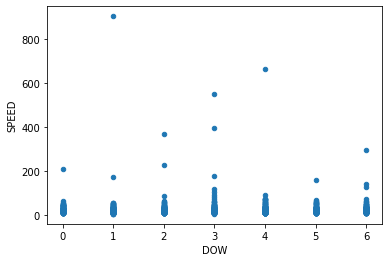

In [16]:
# We can see some huge speeds that probably are incorrect
df.plot.scatter(x='DOW', y='SPEED')

In [17]:
# If we remove the big speeds, it turns out that there is no much change.
df[(df['DURATION'] != 0) & (df['SPEED'] <= 100)].groupby(by='DOW').mean()

,MILES*,DURATION,SPEED
DOW,,,
0,7.958960,20.040462,22.529842
1,8.044509,22.358382,21.490019
2,8.440690,21.351724,21.800367
3,10.946622,25.060811,24.054204
4,12.550000,25.946078,24.490178
5,13.275000,27.500000,23.171041
6,11.507586,22.517241,23.943435


### Category and Purpose

In [18]:
# Taking into account only the purposes that have more than 10 trips, Customer Visit seems to have the longest trips
df.groupby(by=['CATEGORY*', 'PURPOSE*']) \
    .agg(count=('MILES*', 'size'), mean_miles=('MILES*', 'mean'))

count  mean_miles
CATEGORY* PURPOSE*                          
Business  Airport/Travel       3    5.500000
          Between Offices     18   10.944444
          Customer Visit     101   20.688119
          Errand/Supplies    128    3.968750
          Meal/Entertain     160    5.698125
          Meeting            187   15.247594
          Other              431   10.183991
          Temporary Site      50   10.474000
Personal  Charity ($)          1   15.100000
          Commute              1  180.200000
          Moving               4    4.550000
          Other               71    7.101408

In [19]:
# 
df['STOP*'].value_counts()

Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
                   ... 
K Street              1
Hell's Kitchen        1
Cedar Hill            1
Mebane                1
Palm Beach            1
Name: STOP*, Length: 188, dtype: int64